# Anomaly Detection

# Continuous Variable Probabilistic Methods for Identifying Outliers

## Exercises
Using the repo setup directions, setup a new local and remote repository named anomaly-detection-exercises. The local version of your repo should live inside of ~/codeup-data-science. This repo should be named anomaly-detection-exercises

Save this work in your anomaly-detection-exercises repo. Then add, commit, and push your changes.



continuous_probabilistic_methods.py or continuous_probabilistic_methods.ipynb 

1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

## Imports

In [1]:
# standard imports
import numpy as np
import pandas as pd

# my imports
import wrangle as w
import explore as e

# visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def outlier(df, feature, m=1.5):
    '''
    outlier will take in a dataframe's feature:
    - calculate it's 1st & 3rd quartiles,
    - use their difference to calculate the IQR
    - then apply to calculate upper and lower bounds
    - using the `m` multiplier
    '''
    q1 = df[feature].quantile(.25)
    q3 = df[feature].quantile(.75)
    
    iqr = q3 - q1
    
    multiplier = m
    upper_bound = q3 + (multiplier * iqr)
    lower_bound = q1 - (multiplier * iqr)
    
    return upper_bound, lower_bound

### 1. Using lemonade.csv dataset and focusing on continuous variables:

In [3]:
url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"

In [4]:
df = pd.read_csv(url)

In [5]:
summary = w.data_summary(df)
summary

data shape: (365, 7)


,data type,#missing,%missing,#unique,count,mean,std,min,25%,50%,75%,max,first_value,second_value,third_value
date,object,0,0.0,365,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/1/17,1/2/17,1/3/17
day,object,0,0.0,7,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday,Monday,Tuesday
temperature,float64,0,0.0,176,365.0,61.224658,18.085892,15.1,49.7,61.1,71.7,212.0,27.0,28.9,34.5
rainfall,float64,0,0.0,35,365.0,0.825973,0.27389,0.4,0.65,0.74,0.91,2.5,2.0,1.33,1.33
flyers,int64,0,0.0,63,365.0,40.10411,13.786445,-38.0,31.0,39.0,49.0,80.0,15,15,27
price,float64,0,0.0,1,365.0,0.5,0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
sales,int64,0,0.0,39,365.0,27.865753,30.948132,7.0,20.0,25.0,30.0,534.0,10,13,15


In [6]:
df.date = df.date.astype('datetime64')

In [7]:
df = df.set_index('date')

#### Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [8]:
object_cols = e.get_object_cols(df)

In [9]:
num_cols = e.get_numeric_cols(df)

In [10]:
def get_outliers_col(df):
    # get only numeric columns
    num_cols = e.get_numeric_cols(df)

    # drop price as all the prices are the same
    new_cols = num_cols.remove('price')

    # total rows
    orig_shape = df.shape[0]

    for i in num_cols:
        # finding the lower and upper bound outliers for num cols
        col1UP, col1LOW = outlier(df,i)
        df = df[(df[i] < col1UP) & (df[i] > col1LOW)]
        col1 = df.shape[0]
        print(f"{i}: lower= {col1LOW}, upper= {col1UP}, new rows= {col1}\n")

    new_shape = df.shape[0]
    shape_rem = orig_shape-new_shape
    print(f"Total of rows originally: {orig_shape}")
    print(f"Total of rows removed: {shape_rem}")
    print(f"New total of rows: {new_shape}")

In [11]:
# get only numeric columns
num_cols = e.get_numeric_cols(df)

for i in num_cols:
    # finding the lower and upper bound outliers for num cols
    col1UP, col1LOW = outlier(df,i)
    col1 = df.shape[0]
    print(f"{i}: lower= {col1LOW}\n")

temperature: lower= 16.700000000000003

rainfall: lower= 0.26

flyers: lower= 4.0

price: lower= 0.5

sales: lower= 5.0



In [12]:
# finding the lower and upper bound outliers for temperature
temp_acUP, temp_acLOW = outlier(df,'temperature')

# finding the lower and upper bound outliers for rainfall
rain_UP, rain_LOW = outlier(df,'rainfall')

# finding the lower and upper bound outliers for flyers
fly_UP, fly_LOW = outlier(df,'flyers')

# finding the lower and upper bound outliers for price
priceUP, priceLOW = outlier(df,'price')

# finding the lower and upper bound outliers for sales
salesUP, salesLOW = outlier(df,'sales')


print('Handaling OUTLIERS')
print(f"temperature: lower= {temp_acLOW}, upper= {temp_acUP}\n")
print(f"rainfall: lower= {rain_LOW}, upper= {rain_UP}\n")
print(f"flyers: lower= {fly_LOW}, upper= {fly_UP}\n")
print(f"price: lower= {priceLOW}, upper= {priceUP}\n")
print(f"sales: lower= {salesLOW}, upper= {salesUP}\n")

Handaling OUTLIERS
temperature: lower= 16.700000000000003, upper= 104.7

rainfall: lower= 0.26, upper= 1.3

flyers: lower= 4.0, upper= 76.0

price: lower= 0.5, upper= 0.5

sales: lower= 5.0, upper= 45.0



#### Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [13]:
# get only numeric columns
num_cols = e.get_numeric_cols(df)

for i in num_cols:
    # finding the lower and upper bound outliers for num cols
    col1UP, col1LOW = outlier(df,i)
    col1 = df.shape[0]
    print(f"{i}: upper= {col1UP}\n")

temperature: upper= 104.7

rainfall: upper= 1.3

flyers: upper= 76.0

price: upper= 0.5

sales: upper= 45.0



<AxesSubplot:>

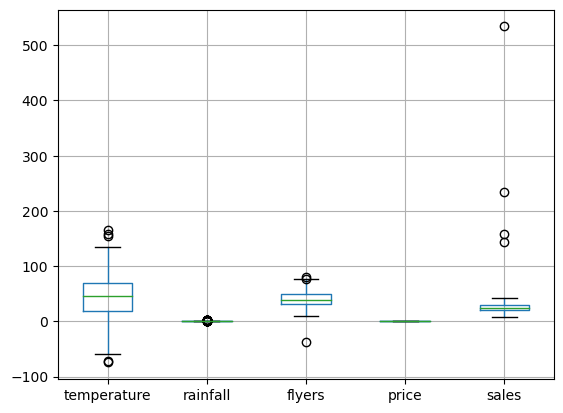

In [23]:
df.boxplot()

#### Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [14]:
def outlier(df, feature, m=3):
    '''
    outlier will take in a dataframe's feature:
    - calculate it's 1st & 3rd quartiles,
    - use their difference to calculate the IQR
    - then apply to calculate upper and lower bounds
    - using the `m` multiplier
    '''
    q1 = df[feature].quantile(.25)
    q3 = df[feature].quantile(.75)
    
    iqr = q3 - q1
    
    multiplier = m
    upper_bound = q3 + (multiplier * iqr)
    lower_bound = q1 - (multiplier * iqr)
    
    return upper_bound, lower_bound

In [15]:
# finding the lower and upper bound outliers for temperature
temp_acUP, temp_acLOW = outlier(df,'temperature')

# finding the lower and upper bound outliers for rainfall
rain_UP, rain_LOW = outlier(df,'rainfall')

# finding the lower and upper bound outliers for flyers
fly_UP, fly_LOW = outlier(df,'flyers')

# finding the lower and upper bound outliers for price
priceUP, priceLOW = outlier(df,'price')

# finding the lower and upper bound outliers for sales
salesUP, salesLOW = outlier(df,'sales')


print('Handaling OUTLIERS')
print(f"temperature: lower= {temp_acLOW}, upper= {temp_acUP}\n")
print(f"rainfall: lower= {rain_LOW}, upper= {rain_UP}\n")
print(f"flyers: lower= {fly_LOW}, upper= {fly_UP}\n")
print(f"price: lower= {priceLOW}, upper= {priceUP}\n")
print(f"sales: lower= {salesLOW}, upper= {salesUP}\n")

Handaling OUTLIERS
temperature: lower= -16.299999999999997, upper= 137.7

rainfall: lower= -0.13, upper= 1.69

flyers: lower= -23.0, upper= 103.0

price: lower= 0.5, upper= 0.5

sales: lower= -10.0, upper= 60.0



In [16]:
# get only numeric columns
num_cols = e.get_numeric_cols(df)

for i in num_cols:
    # finding the lower and upper bound outliers for num cols
    col1UP, col1LOW = outlier(df,i)
    col1 = df.shape[0]
    print(f"{i}: lower= {col1LOW}\n")

temperature: lower= -16.299999999999997

rainfall: lower= -0.13

flyers: lower= -23.0

price: lower= 0.5

sales: lower= -10.0



#### Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [17]:
# get only numeric columns
num_cols = e.get_numeric_cols(df)

for i in num_cols:
    # finding the lower and upper bound outliers for num cols
    col1UP, col1LOW = outlier(df,i)
    col1 = df.shape[0]
    print(f"{i}: upper= {col1UP}\n")

temperature: upper= 137.7

rainfall: upper= 1.69

flyers: upper= 103.0

price: upper= 0.5

sales: upper= 60.0



### 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.

> Do these make sense?
>Should certain outliers be kept or removed?


AttributeError: 'AxesSubplot' object has no attribute 'bin'

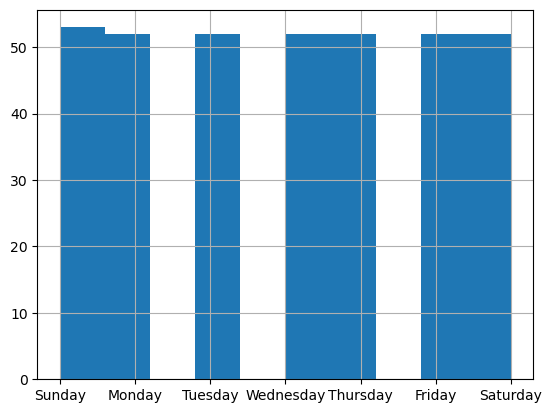

In [25]:
for col in df.columns:
    # print(col)
    df[col].hist()
    plt.title(col)
    plt.show

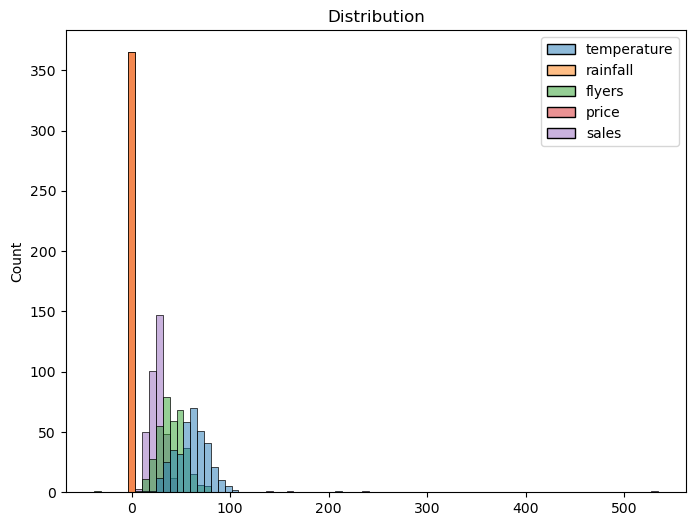

In [18]:
# Checking the distribution of lemonade.csc
plt.figure(figsize=(8, 6))
sns.histplot(df)
plt.title('Distribution')
plt.show()

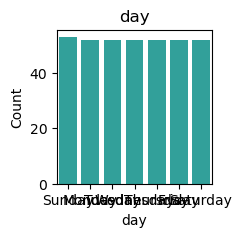

                 day  Count  Percent
Sunday        Sunday     53    14.52
Monday        Monday     52    14.25
Tuesday      Tuesday     52    14.25
Wednesday  Wednesday     52    14.25
Thursday    Thursday     52    14.25
Friday        Friday     52    14.25
Saturday    Saturday     52    14.25


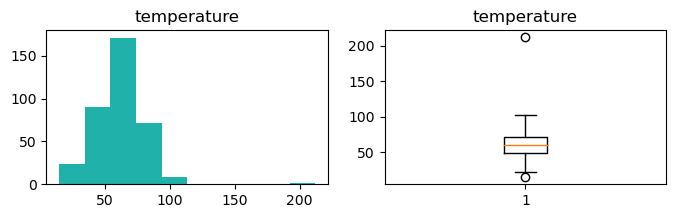

count    365.000000
mean      61.224658
std       18.085892
min       15.100000
25%       49.700000
50%       61.100000
75%       71.700000
max      212.000000
Name: temperature, dtype: float64
______________________________________________________________________________________


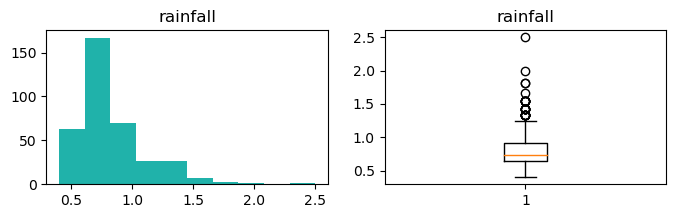

count    365.000000
mean       0.825973
std        0.273890
min        0.400000
25%        0.650000
50%        0.740000
75%        0.910000
max        2.500000
Name: rainfall, dtype: float64
______________________________________________________________________________________


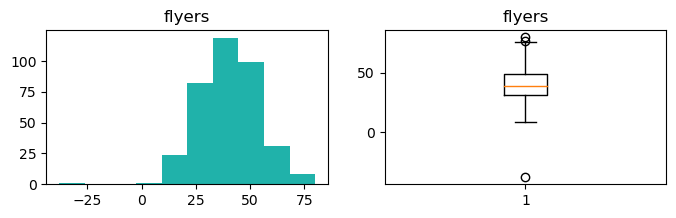

count    365.000000
mean      40.104110
std       13.786445
min      -38.000000
25%       31.000000
50%       39.000000
75%       49.000000
max       80.000000
Name: flyers, dtype: float64
______________________________________________________________________________________


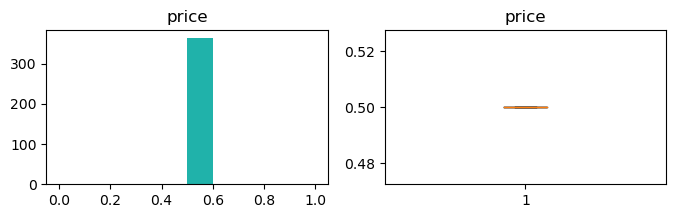

count    365.0
mean       0.5
std        0.0
min        0.5
25%        0.5
50%        0.5
75%        0.5
max        0.5
Name: price, dtype: float64
______________________________________________________________________________________


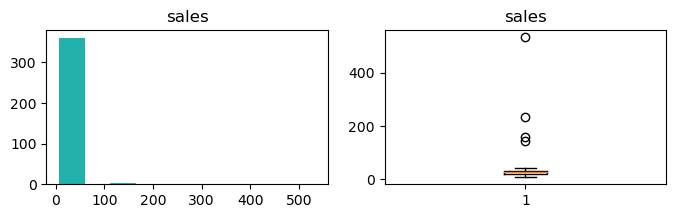

count    365.000000
mean      27.865753
std       30.948132
min        7.000000
25%       20.000000
50%       25.000000
75%       30.000000
max      534.000000
Name: sales, dtype: float64
______________________________________________________________________________________


In [19]:
e.explore_univariate(df, object_cols, num_cols)

In [20]:
df.temperature = np.random.normal(50, 40, size=365)

# Calculate the z-score 
zscores = pd.Series((df.temperature - df.temperature.mean()) / df.temperature.std())

# Finds all of the observations two standard deviations or more.
df.temperature[zscores.abs() >= 2]

date
2017-01-11    188.416330
2017-02-05    -40.297447
2017-03-04    163.404005
2017-05-11    142.235701
2017-05-29    146.294126
2017-06-10    165.456918
2017-07-26    133.313534
2017-07-31    -47.087453
2017-08-03    -30.023617
2017-08-12    133.872545
2017-08-25    -30.387408
2017-09-03    133.388600
2017-09-25    132.698338
2017-10-05    -38.282518
2017-10-26    158.735675
2017-11-24    -32.159003
2017-12-15    -50.962761
2017-12-27    -29.679610
Name: temperature, dtype: float64

In [27]:
normals = ['temperature', 'rainfall', 'flyers']

In [32]:
# df.[col] = np.random.normal(50, 40, size=365)
for col in normals:
    # Calculate the z-score 
    zscores = pd.Series((df[col] - df[col].mean()) / df[col].std())

    # Finds all of the observations two standard deviations or more.
    print(df[col][zscores.abs() >= 2].to_markdown())

| date                |   temperature |
|:--------------------|--------------:|
| 2017-01-02 00:00:00 |      131.931  |
| 2017-01-06 00:00:00 |      130.339  |
| 2017-01-10 00:00:00 |      157.898  |
| 2017-01-22 00:00:00 |      134.602  |
| 2017-01-24 00:00:00 |      132.413  |
| 2017-01-30 00:00:00 |      -58.8228 |
| 2017-02-16 00:00:00 |      133.463  |
| 2017-02-23 00:00:00 |      -39.1175 |
| 2017-03-06 00:00:00 |      -45.7691 |
| 2017-04-03 00:00:00 |      -71.9102 |
| 2017-05-06 00:00:00 |      -45.5141 |
| 2017-05-14 00:00:00 |      -56.407  |
| 2017-05-15 00:00:00 |      -43.4663 |
| 2017-05-26 00:00:00 |      155.189  |
| 2017-06-17 00:00:00 |      128.757  |
| 2017-08-18 00:00:00 |      129.627  |
| 2017-10-03 00:00:00 |      -50.3339 |
| 2017-10-17 00:00:00 |      166.188  |
| 2017-10-30 00:00:00 |      -48.519  |
| 2017-11-23 00:00:00 |      -74.5387 |
| 2017-12-12 00:00:00 |      -47.1827 |
| date                |   rainfall |
|:--------------------|-----------:|
| 2017

### 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [21]:
df.temperature = np.random.normal(50, 40, size=365)

# Calculate the z-score 
zscores = pd.Series((df.temperature - df.temperature.mean()) / df.temperature.std())

# Finds all of the observations three standard deviations or more
df.temperature[zscores.abs() >= 3]

Series([], Name: temperature, dtype: float64)

In [33]:
# df.[col] = np.random.normal(50, 40, size=365)
for col in normals:
    # Calculate the z-score 
    zscores = pd.Series((df[col] - df[col].mean()) / df[col].std())

    # Finds all of the observations two standard deviations or more.
    print(df[col][zscores.abs() >= 3].to_markdown())

| date   | temperature   |
|--------|---------------|
| date                |   rainfall |
|:--------------------|-----------:|
| 2017-01-01 00:00:00 |       2    |
| 2017-01-16 00:00:00 |       1.67 |
| 2017-12-05 00:00:00 |       1.82 |
| 2017-12-10 00:00:00 |       1.82 |
| 2017-12-31 00:00:00 |       2.5  |
| date                |   flyers |
|:--------------------|---------:|
| 2017-11-21 00:00:00 |      -38 |
